# Proyecto final Talento Tech

**Estudiantes:**

Juan Sebastian Ladino Mendieta

Lizeth Daniela Castellanos Alfonso


# Punto 1
Despliegue de modelos de regresión lineal y clasificación utilizando Scikit-Learn y XGBoost

*   En estos modelos de clasificación y regresión es importante desplegar métodos de hiperparámetros como Grid Search y Random Search
*   Caso de estudio: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_palette("magma")

data = pd.read_csv('./data/Punto-1/riceClassification.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [184]:
data.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [185]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


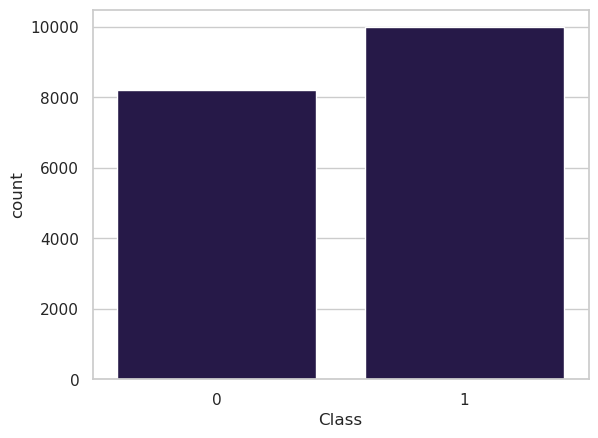

In [186]:
sns.countplot(data=data,x='Class');

### Preparación de los datos


In [187]:
data_vf=data.drop("id",axis=1)

Tenemos que dividir los datos en x y en y

In [188]:
# Eje x: Eliminamos la variable a predecir del eje x, nos referimos a las columnas axis=1
X = data_vf.drop('Class',axis=1)

# Eje y: nuestra variable a predecir
y = data_vf['Class']

print(y.value_counts(normalize=True))

Class
1    0.549079
0    0.450921
Name: proportion, dtype: float64


### Entrenar el modelo

Debemos dividir x y "y" en entrenamirnto y test

20% de los datos van a ser para evaluar el modelo
random_state=42 es una semilla que nos ayuda a aleatorizar los datos

In [189]:
from sklearn.model_selection import train_test_split

# "X" se divide en entrenamiento y test
# "y" se divide en entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
print(f"X_train 80%: {X_train.shape}")
print(f"y_train 80%: {y_train.shape}")
print("\n")
print(f"X_test 20%: {X_test.shape}")
print(f"y_test 20%: {y_test.shape}")

X_train 80%: (14548, 10)
y_train 80%: (14548,)


X_test 20%: (3637, 10)
y_test 20%: (3637,)


**Normalizamos los datos**

Tenemos los datos en escalas mas cercanas para no tener rangos amplios

In [190]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Entrenar datos y transformarlos a datos normalizados o de entrenamiento
X_train_sc = sc.fit_transform(X_train)

# Solo transformamos los datos, no es necesario entrenar al modelo con estos datos porque estaríamos sesgando el modelo
X_test_sc = sc.transform(X_test)

### Regresión Logística
Vamos a realizar solo una regresión logística sin embargo es recomendado realizar varios modelos de machine learning para comparar los resultados.

In [191]:
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression()
# Entrenar los datos
rl.fit(X_train_sc,y_train)

# Pasamos los datos de evaluación
y_pred = rl.predict(X_test_sc)
print(y_pred)

[0 1 0 ... 1 0 0]


In [192]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Accuracy Regresión Lineal: {X_train.shape}")
accuracy_rl_1 = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

Accuracy Regresión Lineal: (14548, 10)
0.9898267803134452


In [193]:
print(confusion_matrix(y_test,y_pred))

[[1609   23]
 [  14 1991]]


#### Selección de variables

In [194]:
from sklearn.feature_selection import RFE
rfe = RFE(rl,n_features_to_select=4)
rfe.fit(X_train_sc,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Area', False, 6),
 ('MajorAxisLength', True, 1),
 ('MinorAxisLength', True, 1),
 ('Eccentricity', False, 2),
 ('ConvexArea', True, 1),
 ('EquivDiameter', True, 1),
 ('Extent', False, 7),
 ('Perimeter', False, 4),
 ('Roundness', False, 3),
 ('AspectRation', False, 5)]

Las 4 variables mas importantes para predecir la Clase son

*   MajorAxisLength
*   MinorAxisLength
*   ConvexArea
*   EquivDiameter

### Arbol de decisión

In [195]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# el criterio puede ser log_loss o entropy
treeclass = DecisionTreeClassifier(max_depth=5,criterion="log_loss")
# entrenar modelo
treeclass.fit(X_train_sc,y_train)
# extraemos predicción
y_pred_tree = treeclass.predict(X_test_sc)

#listar predicciones
print(y_pred_tree)

[0 1 0 ... 1 0 0]


In [196]:
# variables analizadas, se conserva el orden
print(X_train.columns)

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation'],
      dtype='object')


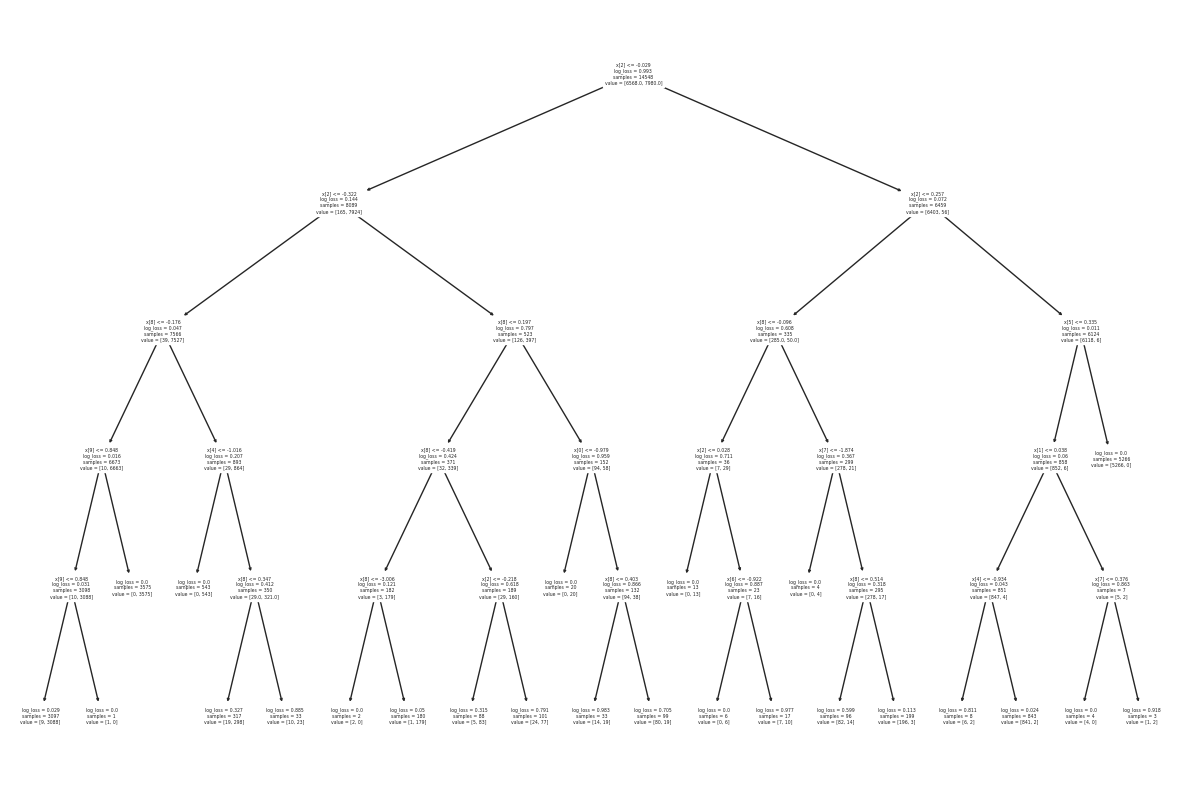

In [197]:
plt.figure(figsize=(15, 10))
plot_tree(treeclass)
plt.show()

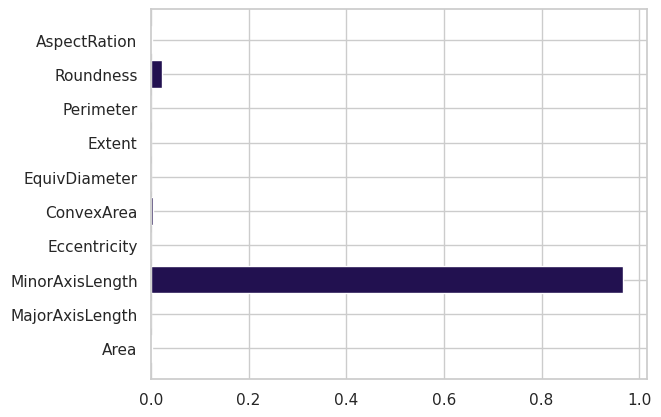

In [198]:
plt.barh(width=treeclass.feature_importances_,y=X_train.columns)
plt.show()

In [199]:
print(f"Regresión lineal: {accuracy_score(y_test,y_pred)}")
print(f"Arboles de decisión: {accuracy_score(y_test,y_pred_tree)}")

Regresión lineal: 0.9898267803134452
Arboles de decisión: 0.9887269727797635


In [200]:
print(f"Regresión lineal")
print(confusion_matrix(y_test,y_pred))

Regresión lineal
[[1609   23]
 [  14 1991]]


In [201]:
print("Arboles de decisión")
print(confusion_matrix(y_test,y_pred_tree))

Arboles de decisión
[[1605   27]
 [  14 1991]]


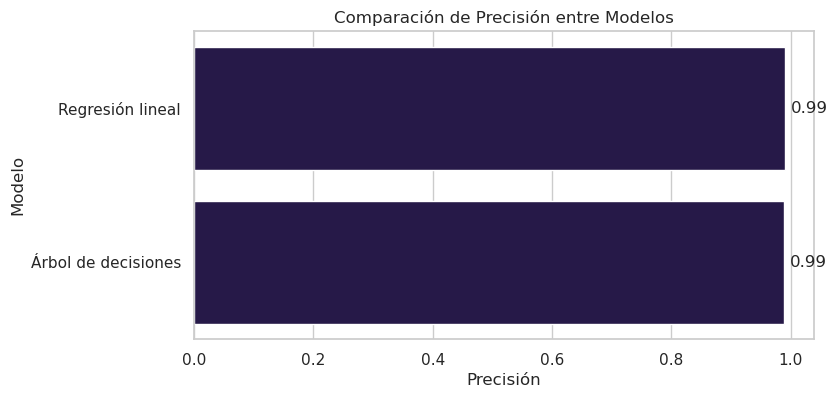

In [202]:
modelos = ['Árbol de decisiones', 'Regresión lineal']
precision = [accuracy_score(y_test,y_pred_tree), accuracy_score(y_test,y_pred)]  # Cambia los valores por las precisiones que tengas

df = pd.DataFrame({'Modelo': modelos, 'Precisión': precision})

df = df.sort_values(by='Precisión', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Precisión', y='Modelo', data=df, orient='h')

plt.xlabel('Precisión')
plt.ylabel('Modelo')
plt.title('Comparación de Precisión entre Modelos')

for i, (precision, modelo) in enumerate(zip(df['Precisión'], df['Modelo'])):
    plt.text(precision + 0.01, i, f'{precision:.2f}', va='center')  

plt.show()

# Punto 2:

Despliegue un clustering K-Means para el siguiente caso de estudio. De modo que se pueda perfilar los grupos del clúster.

*   Caso de estudio: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

# Punto 3:

Implementación de un sistema de recomendación con Scikit-surprise

*   Caso de estudio: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data?select=Ratings.csv

# Punto 4:

Desplegar para el siguiente caso de estudio un modelo de Deep learning con redes neuronales convolucionales.

*   Es importante mencionar que para este caso debe desplegar una arquitectura propia para la red neuronal convolucional.
*   Por otra parte, debe desplegar por lo menos 3 arquitecturas vistas en clase para el caso de estudio
*   Caso de estudio: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification/data

In [1]:
import  os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print(f"Se encontró GPU: {physical_devices[0].name}")
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No se encontró ninguna GPU, usando CPU.")

2024-09-04 00:05:20.638643: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-04 00:05:20.641807: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-04 00:05:20.650985: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 00:05:20.665641: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 00:05:20.669964: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 00:05:20.681486: I tensorflow/core/platform/cpu_feature_gu

No se encontró ninguna GPU, usando CPU.


In [2]:
image_dir  = './data/Punto-4/train'
labels = pd.read_csv('data/Punto-4/Training_set.csv')
labels.head(3)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA


In [3]:
IMG_SIZE = (160, 160)
BATCH_SIZE = 32
IMG_SHAPE = IMG_SIZE + (3,)

In [4]:
len(labels)

6499

In [4]:
class_num = len(labels['label'].unique())

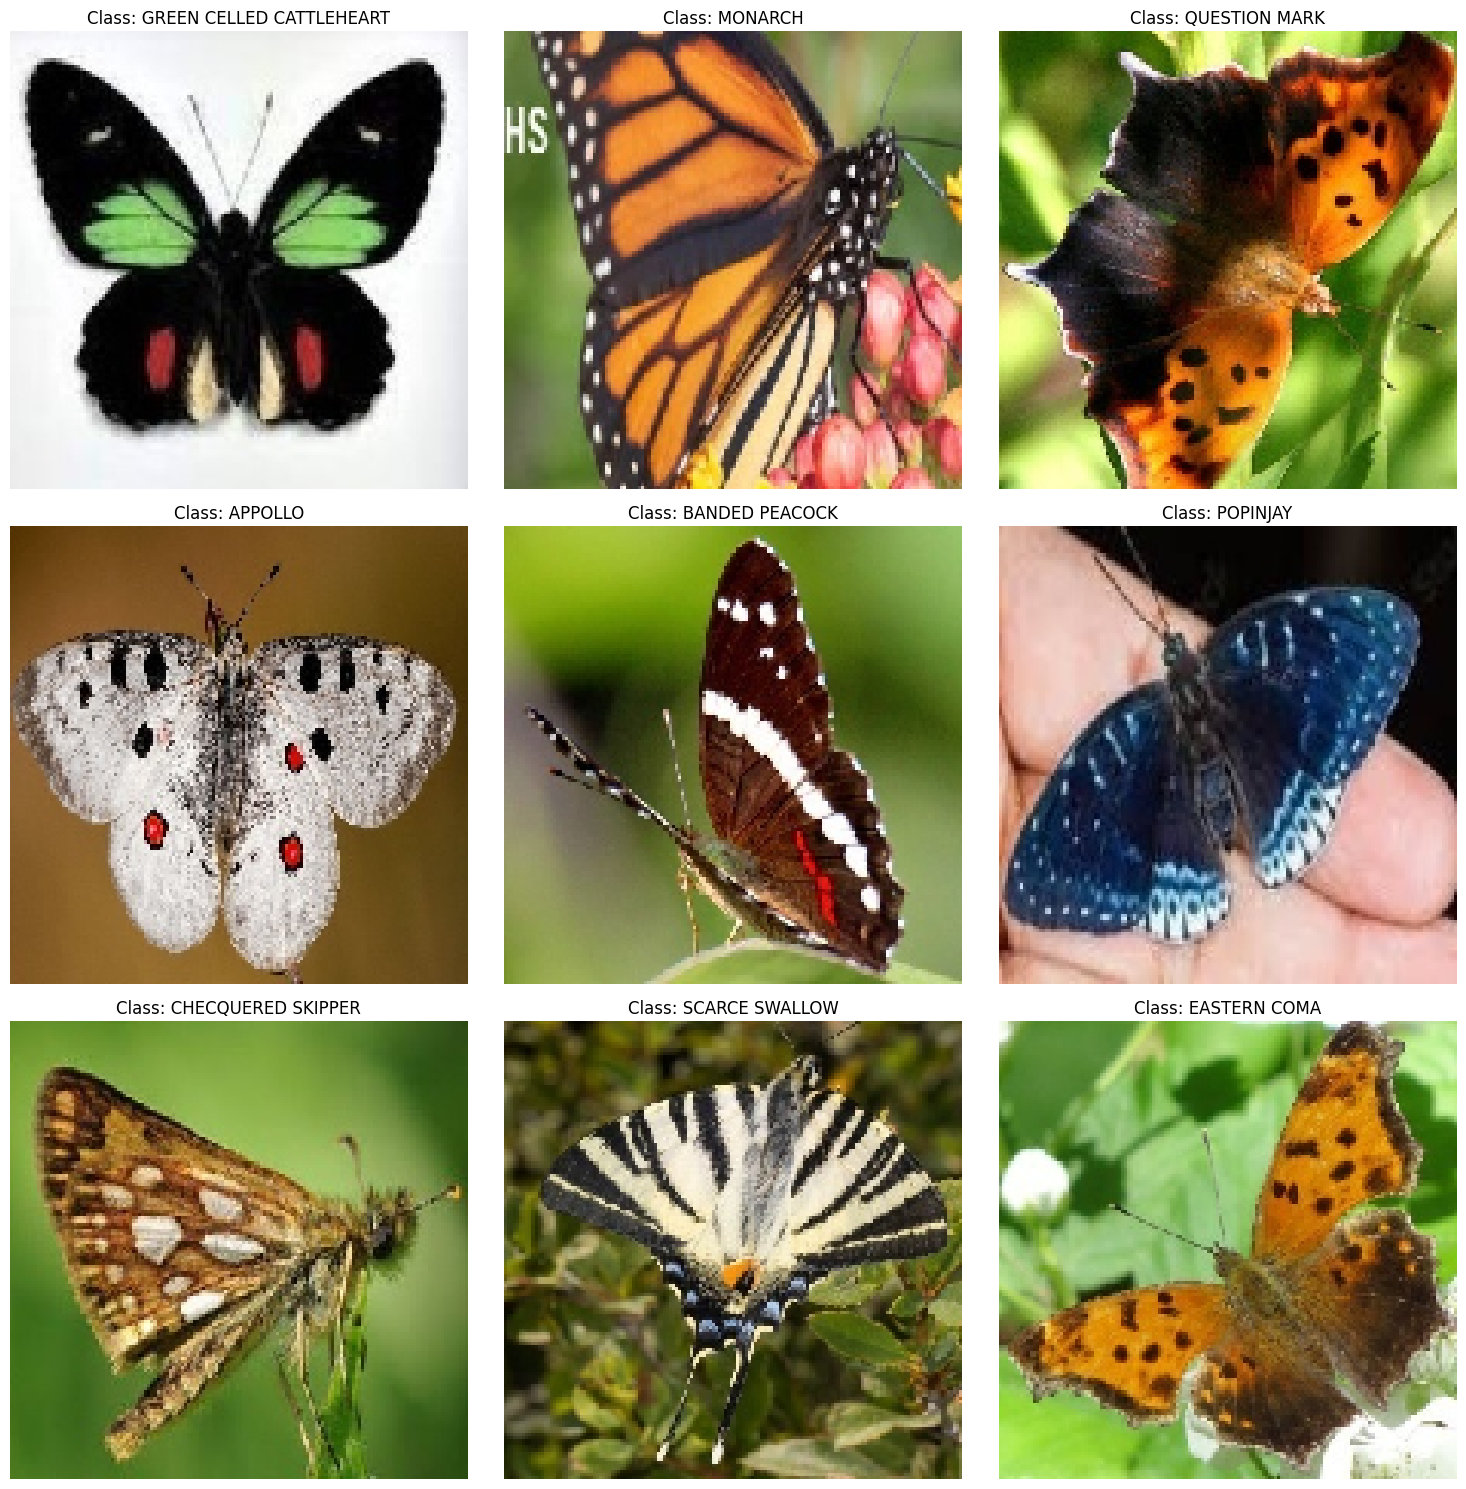

In [5]:
sample_images = labels.sample(9, random_state=42)


fig, axes = plt.subplots(3, 3, figsize=(15, 15))


for i, (index, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(image_dir, row['filename'])
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    
    ax = axes[i // 3, i % 3]
    ax.imshow(img_array)
    ax.set_title(f"Class: {row['label']}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
train_df, val_df = train_test_split(labels, test_size=0.2, random_state=42)

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generador de datos para validación
val_datagen = ImageDataGenerator(rescale=1./255)

# Creación de generadores de entrenamiento y validación
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'  
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'  
)

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


In [8]:
def evaluate_model(model, test_dataset, class_names):
    plt.figure(figsize=(15, 15))
    for images, labels in test_dataset.take(1):
        for i in range(16):
            ax = plt.subplot(4, 4, i + 1)
            plt.imshow(images[i].numpy().astype('uint8'))
            img_array = tf.keras.preprocessing.image.img_to_array(images[i])
            img_array = tf.expand_dims(img_array, 0)

            predictions = model.predict(img_array)
            score = tf.nn.softmax(predictions[0])

            predicted_class = class_names[tf.argmax(score)]
            confidence = 100 * tf.reduce_max(score)
            true_class = class_names[labels[i]]

            plt.title(f"True: {true_class}\nPred: {predicted_class} ({confidence:.2f}%)")
            plt.axis("off")
    plt.show()

In [9]:
def plot_training_history(histories, titles):

    num_histories = len(histories)
    plt.figure(figsize=(15, 10))

    for i, history in enumerate(histories):
        plt.subplot(2, num_histories, i + 1)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f'{titles[i]} Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')

        plt.subplot(2, num_histories, i + 1 + num_histories)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f'{titles[i]} Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [10]:
def plot_accuracy_comparison(evaluations, titles):
    if len(evaluations) != len(titles):
        raise ValueError("The length of evaluations and titles must be the same.")

   
    accuracies = [evaluation[1] for evaluation in evaluations] 

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(titles, accuracies, color='skyblue')
    plt.xlabel('Model Architecture')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.ylim(0, 1)  
    plt.show()

### Arquitecura MobileNetV2

In [12]:
def preprocessin_mobilenet(image_forma=IMG_SIZE, data_aumentation=None, class_num=None):
    img_vf_shape = image_forma + (3,)
    modelo_base = tf.keras.applications.MobileNetV2(input_shape=img_vf_shape, include_top=False, weights='imagenet')
    modelo_base.trainable = False

    datos_entrada = tf.keras.Input(shape=img_vf_shape)

    if data_aumentation:
        x = data_aumentation(datos_entrada)
    else:
        x = datos_entrada

    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
    x = modelo_base(x, training=False)
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dropout(0.2)(x)
    prediction = tf.keras.layers.Dense(class_num, activation='softmax')(x) 

    modelo_final = tf.keras.Model(datos_entrada, prediction)
    return modelo_final

In [13]:
MobileNet= preprocessin_mobilenet(image_forma=IMG_SIZE, class_num=class_num)
MobileNet.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [14]:
mobilenet_history = MobileNet.fit(train_generator, validation_data=val_generator, epochs=5)

Epoch 1/5


/home/juanse/miniconda3/envs/proyecto/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 423ms/step - accuracy: 0.0125 - loss: 4.6161 - val_accuracy: 0.0208 - val_loss: 4.3665
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 403ms/step - accuracy: 0.0175 - loss: 4.4389 - val_accuracy: 0.0169 - val_loss: 4.3091
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 405ms/step - accuracy: 0.0271 - loss: 4.3847 - val_accuracy: 0.0238 - val_loss: 4.2706
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 411ms/step - accuracy: 0.0243 - loss: 4.3688 - val_accuracy: 0.0338 - val_loss: 4.2387
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 411ms/step - accuracy: 0.0252 - loss: 4.3136 - val_accuracy: 0.0238 - val_loss: 4.2010


In [15]:
MobileNe_evaluation = MobileNet.evaluate(val_generator)

41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 269ms/step - accuracy: 0.0307 - loss: 4.1813


### Arquitecura EfficientNet3B

In [21]:
model_effnet3b = tf.keras.applications.EfficientNetB3(include_top=False,input_shape=IMG_SHAPE,weights='imagenet')

In [22]:
EfficientNe= tf.keras.Sequential([
    model_effnet3b,
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(class_num, activation='softmax')
])
EfficientNe.compile(optimizer='adam', 
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
                    metrics=['accuracy']
                    )

In [23]:
EfficientNe_history = EfficientNe.fit(train_generator, validation_data=val_generator, epochs=3)

Epoch 1/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 653s 4s/step - accuracy: 0.2931 - loss: 3.2056 - val_accuracy: 0.0062 - val_loss: 4.7219
Epoch 2/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 584s 4s/step - accuracy: 0.8217 - loss: 0.7525 - val_accuracy: 0.0308 - val_loss: 4.6779
Epoch 3/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 575s 4s/step - accuracy: 0.8814 - loss: 0.4683 - val_accuracy: 0.1554 - val_loss: 4.0356


In [24]:
EfficientNe_evaluation = EfficientNe.evaluate(val_generator)

41/41 ━━━━━━━━━━━━━━━━━━━━ 25s 616ms/step - accuracy: 0.1615 - loss: 3.9629


### Arquitectura VGG-16 Net

In [25]:
modelo_vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=IMG_SHAPE)

In [26]:
model_VGG= tf.keras.Sequential([
    modelo_vgg16,
    Flatten(),
    Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    Dense(class_num, activation='softmax')
])
model_VGG.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [27]:
VGG_history = model_VGG.fit(train_generator, validation_data=val_generator, epochs=3)

Epoch 1/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 937s 6s/step - accuracy: 0.0142 - loss: 4.5472 - val_accuracy: 0.0269 - val_loss: 4.3169
Epoch 2/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 920s 6s/step - accuracy: 0.0174 - loss: 4.3167 - val_accuracy: 0.0269 - val_loss: 4.3167
Epoch 3/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 921s 6s/step - accuracy: 0.0191 - loss: 4.3149 - val_accuracy: 0.0269 - val_loss: 4.3164


In [28]:
model_VGG_evaluation = model_VGG.evaluate(val_generator)

41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.0315 - loss: 4.3171


In [29]:
labels_list = ['MobileNetV2', 'EfficientNetB3', 'VGG16',]

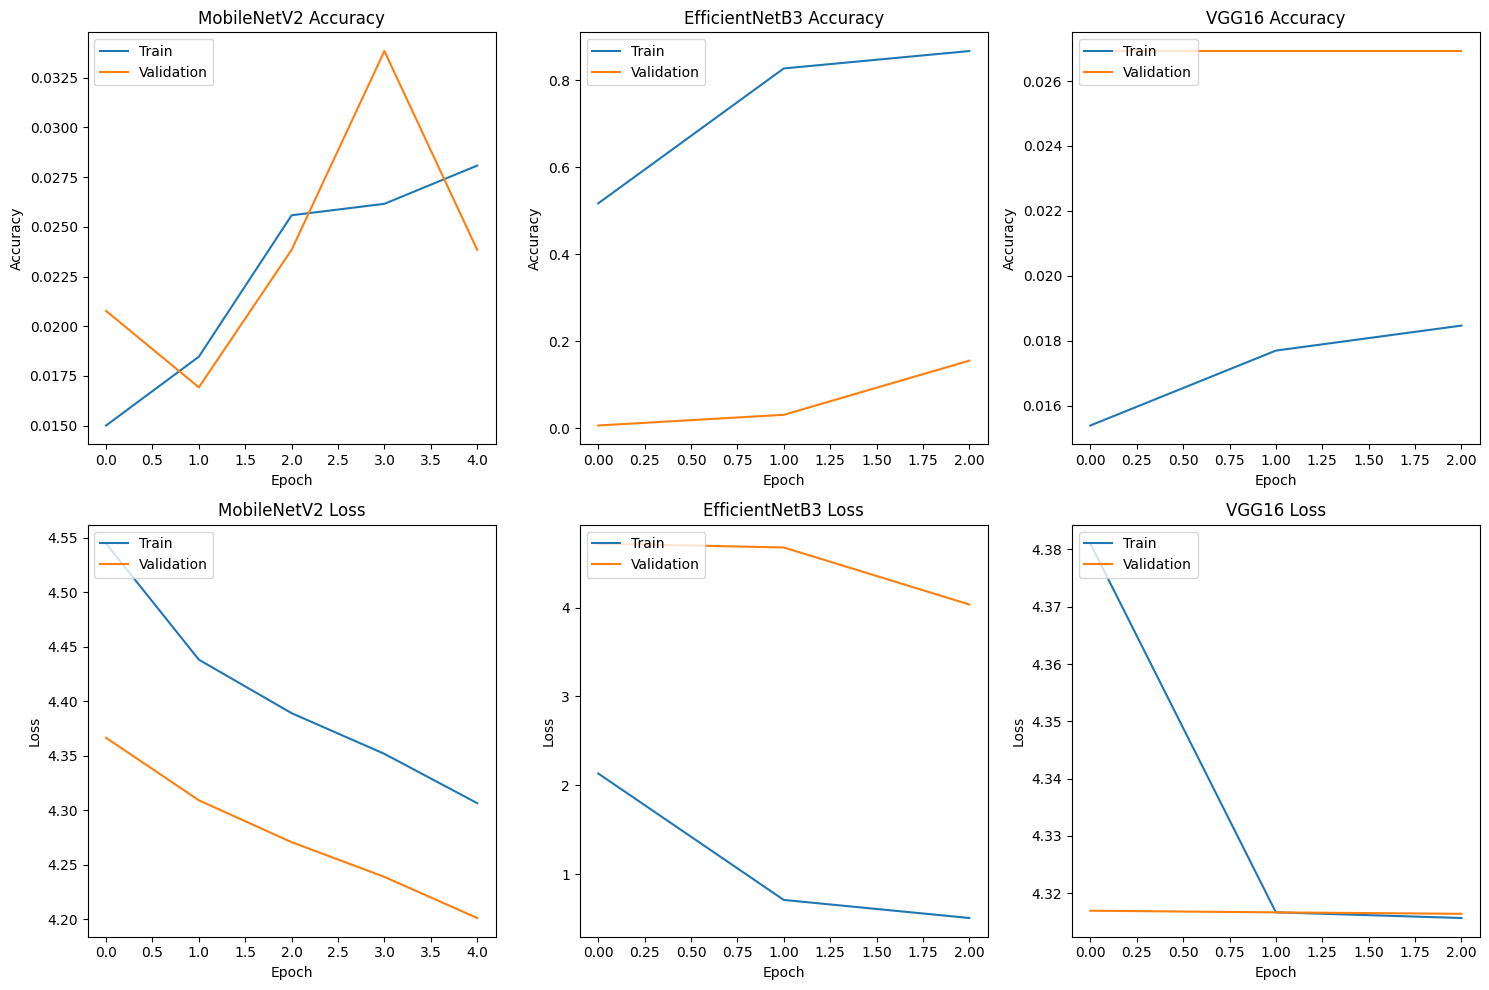

In [30]:
plot_training_history([mobilenet_history, EfficientNe_history, VGG_history], titles= labels_list)

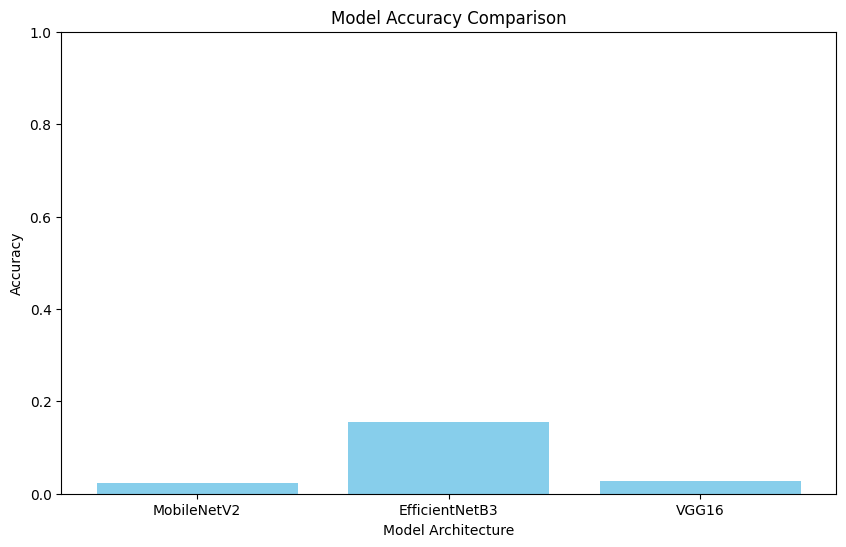

In [31]:
plot_accuracy_comparison([MobileNe_evaluation, EfficientNe_evaluation, model_VGG_evaluation], titles= labels_list)

# Punto 5:

 Desplegar para el siguiente caso de estudio una red neuronal recurrente con arquitectura LSTM y otra con GRU

*   Caso de estudio: https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset
*   Realizar la predicción para el precio de la columna de la Adj Close en el dataset

In [1]:
from typing import Tuple
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, explained_variance_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU

2024-09-03 21:42:39.214321: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-03 21:42:39.217527: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-03 21:42:39.227144: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 21:42:39.242774: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 21:42:39.247111: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-03 21:42:39.258748: I tensorflow/core/platform/cpu_feature_gu

In [2]:
df_5 = pd.read_csv('data/Punto-5/FINAL_USO.csv')
scaler = MinMaxScaler(feature_range=(0,1))

In [3]:
df_5.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [4]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [5]:
nan_columns_count = df_5.isna().any().sum()

print(f"El número de columnas con al menos un NaN es: {nan_columns_count}")

El número de columnas con al menos un NaN es: 0


In [6]:
df_5['Date'] = pd.to_datetime(df_5['Date'])

In [7]:
df_5 = df_5.sort_values(by='Date')
df_5.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [8]:
df_5 = df_5.set_index('Date')
df_5.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [9]:

df_time_diffs = df_5.index.to_series().diff().dt.total_seconds()
df_time_diffs_days = df_time_diffs / 86400
print(df_time_diffs_days.value_counts())

Date
1.0     1319
3.0      303
4.0       58
2.0       33
5.0        1
16.0       1
6.0        1
20.0       1
Name: count, dtype: int64


In [10]:
df_5 = df_5.asfreq(freq='D', method='bfill')

df_time_diffs = df_5.index.to_series().diff().dt.total_seconds()
df_time_diffs_days = df_time_diffs / 86400
print(df_time_diffs_days.value_counts())

Date
1.0    2573
Name: count, dtype: int64


In [11]:
def preparardatostemperatura(data: pd.DataFrame, length: int, variable: str )-> Tuple[np.ndarray, np.ndarray]:
   #funcion para cargar en esta parte los datos y la longitutd
    #seleccionar los valores relevantes para la predicción
    data = data[[variable]].values

    data = scaler.fit_transform(data)
    #Guardar en x la secuencia y en guardar el valor objetivo a analizar
    X,y = [],[]
    #función que me permita retornar con cada indice en x la secuencia y en y el valor objetivo
    for i in range(len(data)-length): #Condición del for para asegurar que no se excedan los datos
        X.append(data[i:i+length]) #creación de secuencias para tomar una subsecuencia
        y.append(data[i+length]) #Tomar el valor siguiente de la secuencia como objetivo

    X = np.array(X) #convertir las secuencias en un arreglo
    y = np.array(y) #convertir los objetivos en un arreglo
    X = X.reshape(X.shape[0],X.shape[1],1) #Pasar en el X.shape[0] las muestras, en el X.shape[1] las secuencias y el 1 que es una unica caracteristica en este caso la temperataura media
    return X,y

In [12]:
sequence_length = 7
X, y = preparardatostemperatura(df_5, sequence_length, 'Adj Close')

In [13]:
train = int(len(X)*0.75)
test = len(X) - train

In [14]:
X_train,X_test = X[:train],X[train:]
y_train,y_test = y[:train],y[train:]

print(X_train.shape,X_test.shape)

(1925, 7, 1) (642, 7, 1)


In [15]:
model_lstm = Sequential([
    LSTM(80,activation='relu',input_shape=(sequence_length,1),return_sequences=True),
    LSTM(70,activation='relu',return_sequences=True),
    layers.BatchNormalization(),
    LSTM(30,activation='relu'),
    layers.Dropout(0.2),
    Dense(1)
])

/home/juanse/miniconda3/envs/proyecto/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model_lstm.compile(optimizer=Adam(learning_rate=0.01),loss='mse',metrics=['mae'])

In [17]:
history_lstm = model_lstm.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0423 - mae: 0.1328 - val_loss: 0.0041 - val_mae: 0.0526
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0107 - mae: 0.0744 - val_loss: 0.0032 - val_mae: 0.0479
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0063 - mae: 0.0594 - val_loss: 0.0033 - val_mae: 0.0484
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0051 - mae: 0.0503 - val_loss: 0.0029 - val_mae: 0.0447
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mae: 0.0559 - val_loss: 0.0036 - val_mae: 0.0493
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0044 - mae: 0.0465 - val_loss: 0.0062 - val_mae: 0.0657
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mae: 0.0504 - val_loss: 0.0048 - val_mae: 0.0580
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mae: 0.0478 - val_loss: 0.0045 - val_mae: 0.0565
Epoch 9/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - lo

In [18]:
y_pred_lstm = model_lstm.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [19]:
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    return mae / mae_naive_no_season

def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Instanciar métricas
    mae_metric = tf.keras.metrics.MeanAbsoluteError()
    mse_metric = tf.keras.metrics.MeanSquaredError()
    mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()

    # Actualizar el estado de las métricas con los valores reales y predichos
    mae_metric.update_state(y_true, y_pred)
    mse_metric.update_state(y_true, y_pred)
    mape_metric.update_state(y_true, y_pred)

    # Calcular las métricas
    mae = mae_metric.result()
    mse = mse_metric.result()
    rmse = tf.sqrt(mse)
    mape = mape_metric.result()
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Convertir los tensores a numpy
    y_true_np = y_true.numpy()
    y_pred_np = y_pred.numpy()
    r2 = r2_score(y_true_np, y_pred_np)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy(),
        "r2_score": r2,
    }

In [20]:
results_lstm = evaluate_preds(y_test.flatten(), y_pred_lstm.flatten())
print(results_lstm)

{'mae': 0.010703261, 'mse': 0.0001623992, 'rmse': 0.012743594, 'mape': 4.017935, 'mase': 2.0300822, 'r2_score': 0.952855110168457}


In [21]:
def plot_combined_time_series(timesteps, y_true, y_pred, start=0, end=None):
    plt.figure(figsize=(25, 7))
    
    # Graficar los valores reales
    plt.plot(timesteps[start:end], y_true[start:end], '-', label="Actual")
    
    # Graficar los valores predichos
    plt.plot(timesteps[start:end], y_pred[start:end], '-', label="Predict")
    
    # Configurar etiquetas y leyenda
    plt.xlabel("Time")
    plt.ylabel("Nat Demand")
    plt.legend(fontsize=14)
    plt.grid(True)
    
    # Mostrar la gráfica
    plt.show()



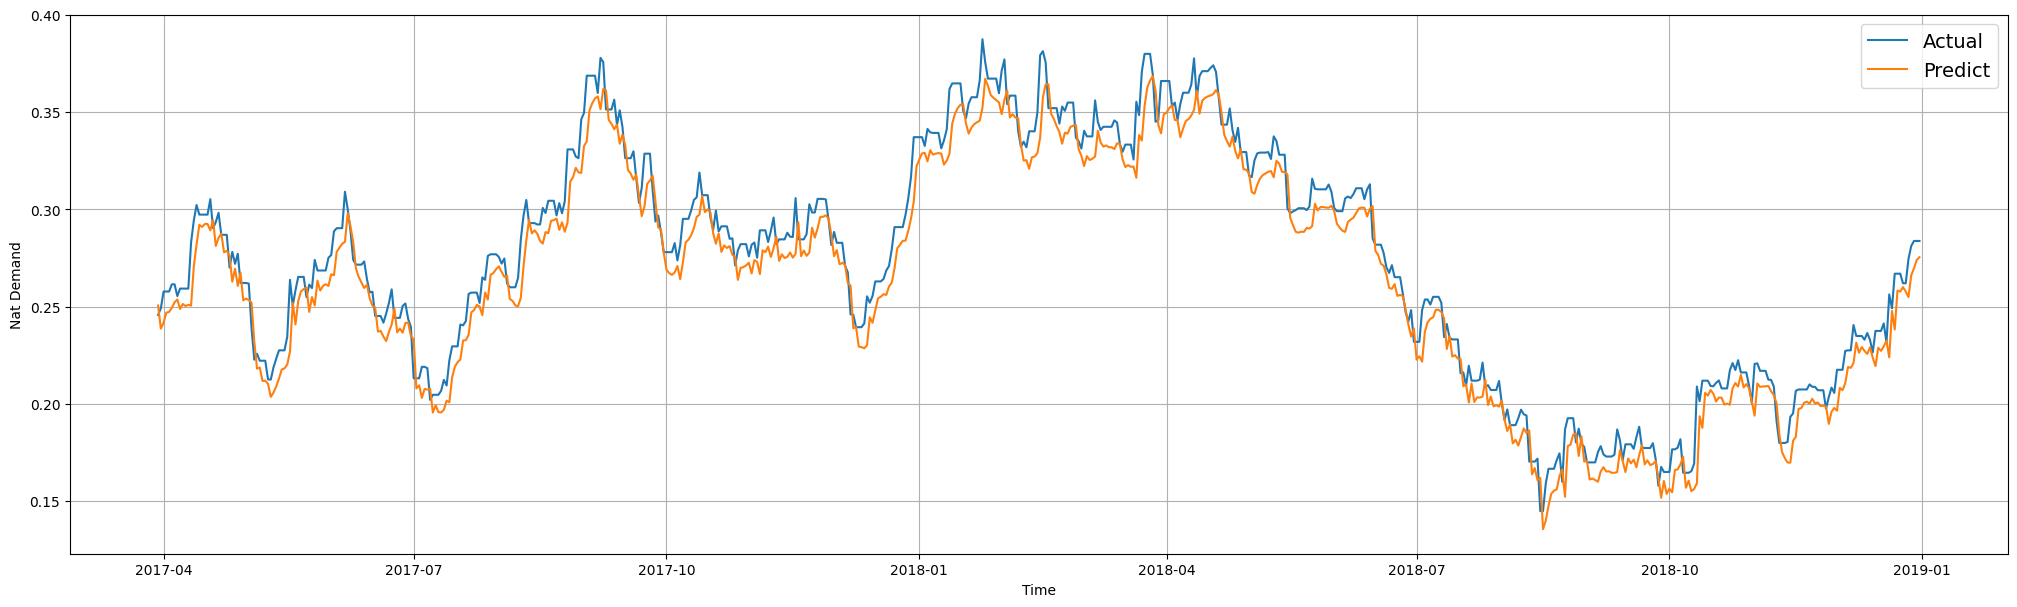

In [22]:
timesteps_test = df_5.index[-len(X_test):]
plot_combined_time_series(timesteps=timesteps_test, y_true=y_test.flatten(), y_pred=y_pred_lstm.flatten())

In [23]:
model_gru = Sequential([
    GRU(80,activation='relu',input_shape=(sequence_length,1), return_sequences=True),
    GRU(70, activation='relu',return_sequences=True),
    layers.BatchNormalization(),
    GRU(30, activation='relu'),
    layers.Dropout(0.2),
    Dense(1)
])

/home/juanse/miniconda3/envs/proyecto/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model_gru.compile(optimizer=Adam(learning_rate=0.01),loss='mse',metrics=['mae'])

In [25]:
history_gru = model_gru.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0857 - mae: 0.1524 - val_loss: 0.0138 - val_mae: 0.1046
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0097 - mae: 0.0724 - val_loss: 0.0101 - val_mae: 0.0864
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0083 - mae: 0.0654 - val_loss: 0.0068 - val_mae: 0.0688
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0067 - mae: 0.0595 - val_loss: 0.0048 - val_mae: 0.0574
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0052 - mae: 0.0534 - val_loss: 0.0025 - val_mae: 0.0418
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0045 - mae: 0.0493 - val_loss: 0.0022 - val_mae: 0.0394
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0048 - mae: 0.0534 - val_loss: 0.0024 - val_mae: 0.0394
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040 - mae: 0.0475 - val_loss: 0.0027 - val_mae: 0.0452
Epoch 9/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - lo

In [26]:
y_pred_gru = model_gru.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [27]:
results_gru = evaluate_preds(y_test.flatten(), y_pred_gru.flatten())
print(results_gru)

{'mae': 0.016376298, 'mse': 0.0003331769, 'rmse': 0.018253135, 'mape': 6.614652, 'mase': 3.1060843, 'r2_score': 0.9032779932022095}


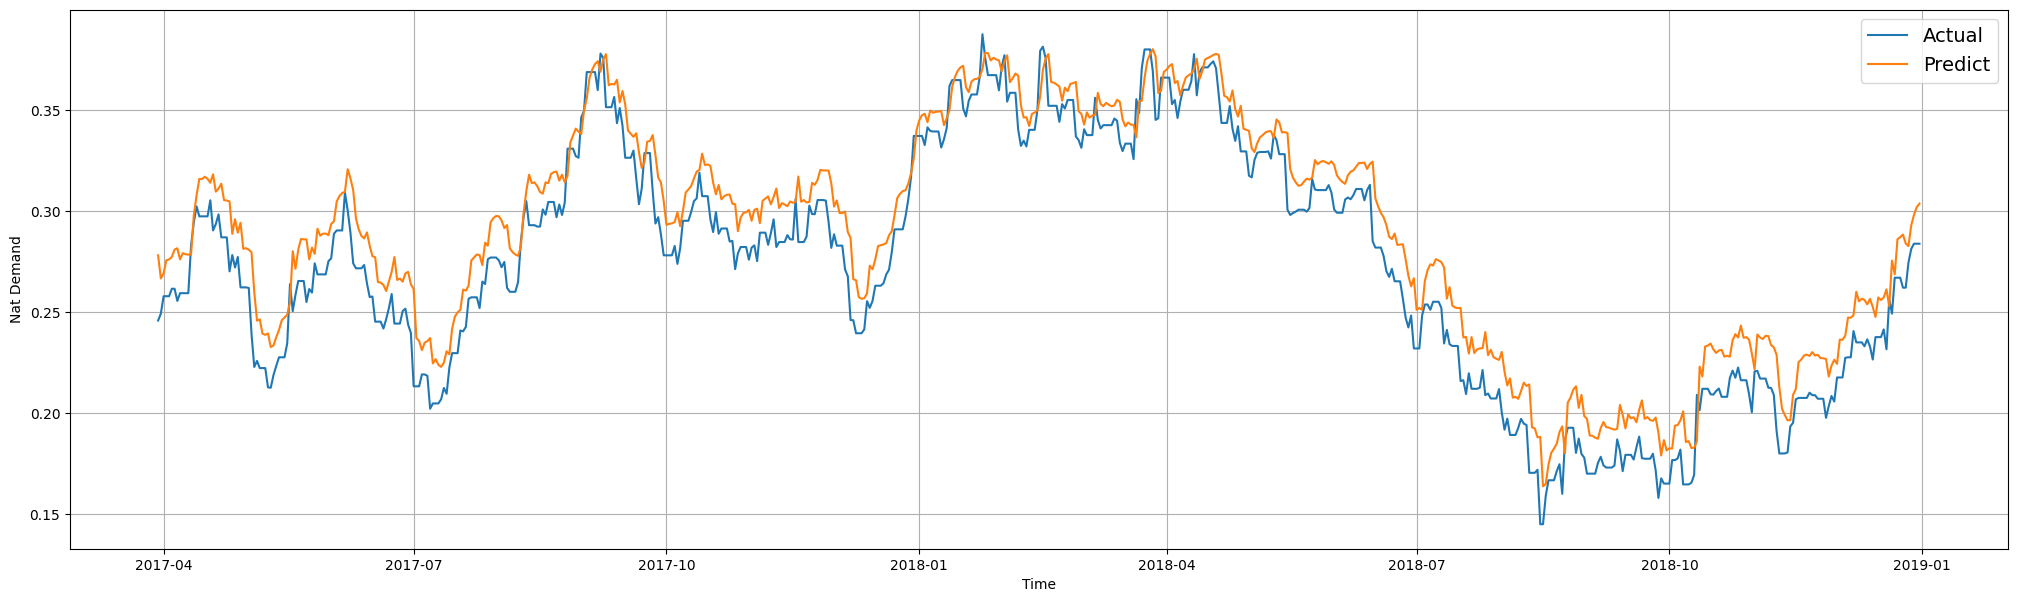

In [28]:
plot_combined_time_series(timesteps=timesteps_test, y_true=y_test.flatten(), y_pred=y_pred_gru.flatten())